In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("dataset.csv")

In [4]:
# unique no of labels along with their count
print(df1['label'].value_counts())
# print(df2['label'].value_counts())

label
1    1760670
0     906853
Name: count, dtype: int64


In [5]:
# loading the second df
df2 = pd.read_csv("../Shared folder/FlowStatsfile.csv") 

In [6]:
# attach df2 to bottom of df1
df3 = pd.concat([df1, df2], axis=0)

In [7]:
# set the columns of df1 to be columns of df2
df2.columns = df1.columns

In [8]:
df2

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
0,1.709006e+09,4,10.0.0.9010.0.0.1201,10.0.0.9,0,10.0.0.12,0,1,0,8,...,20,100,0,1,98,0.5000,2.044990e-09,4.900000e+01,2.004090e-07,0
1,1.709006e+09,3,10.0.0.1505010.0.0.9543806,10.0.0.1,5050,10.0.0.9,54380,6,-1,-1,...,20,100,0,61660,4114316,30830.0000,1.352193e-04,2.057158e+06,9.022623e-03,0
2,1.709006e+09,3,10.0.0.12505010.0.0.9543801,10.0.0.12,5050,10.0.0.9,54380,1,0,0,...,20,100,0,1,98,0.5000,2.136752e-09,4.900000e+01,2.094017e-07,0
3,1.709006e+09,3,10.0.0.95438010.0.0.150506,10.0.0.9,54380,10.0.0.1,5050,6,0,0,...,20,100,0,130545,6188513434,65272.5000,2.585050e-04,3.094257e+09,1.225448e+01,0
4,1.709006e+09,3,10.0.0.95438010.0.0.1250501,10.0.0.9,54380,10.0.0.12,5050,1,0,8,...,20,100,0,1,98,0.5000,1.980198e-09,4.900000e+01,1.940594e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23206,1.709012e+09,3,10.0.0.96045010.0.0.1850501,10.0.0.9,60450,10.0.0.18,5050,1,0,0,...,20,100,0,4,392,0.2500,4.938272e-08,2.450000e+01,4.839506e-06,0
23207,1.709012e+09,6,10.0.0.1505010.0.0.18604506,10.0.0.1,5050,10.0.0.18,60450,6,-1,-1,...,20,100,0,230898,15286016,14431.1250,4.275889e-03,9.553760e+05,2.830744e-01,0
23208,1.709012e+09,6,10.0.0.186045010.0.0.150506,10.0.0.18,60450,10.0.0.1,5050,6,-1,-1,...,20,100,0,483848,22615121368,30240.5000,5.093137e-03,1.413445e+09,2.380539e+02,0
23209,1.709012e+09,6,10.0.0.186045010.0.0.950501,10.0.0.18,60450,10.0.0.9,5050,1,0,8,...,20,100,0,5,466,0.3125,5.102041e-08,2.912500e+01,4.755102e-06,0


In [24]:
final_df = pd.concat([df1, df2], axis=0)

In [25]:
print(final_df['label'].value_counts())

label
1    1760670
0     930064
Name: count, dtype: int64


In [26]:
# export to csv
final_df.to_csv("final_dataset.csv", index=False)

In [27]:
print(df1['label'].value_counts())
print(final_df['label'].value_counts())

label
1    1760670
0     906853
Name: count, dtype: int64
label
1    1760670
0     930064
Name: count, dtype: int64


In [9]:
final_df = pd.read_csv("final_dataset.csv")

In [10]:
# total no of rows in the final dataset and df1
print(final_df.shape)
print(df1.shape)

(2690734, 22)
(2667523, 22)


In [13]:
# importing insights class

from datainsights.Insight import Insights

insighter = Insights(final_df)
insighter.print_insights()



Shape of the dataset: (2690734, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2690734 entries, 0 to 2690733
Data columns (total 22 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   timestamp                 float64
 1   datapath_id               int64  
 2   flow_id                   object 
 3   ip_src                    object 
 4   tp_src                    int64  
 5   ip_dst                    object 
 6   tp_dst                    int64  
 7   ip_proto                  int64  
 8   icmp_code                 int64  
 9   icmp_type                 int64  
 10  flow_duration_sec         int64  
 11  flow_duration_nsec        int64  
 12  idle_timeout              int64  
 13  hard_timeout              int64  
 14  flags                     int64  
 15  packet_count              int64  
 16  byte_count                int64  
 17  packet_count_per_second   float64
 18  packet_count_per_nsecond  float64
 19  byte_count_per_second     

In [16]:
from datacleaner.cleaner import DataCleaning

df = pd.read_csv("final_dataset.csv")
data_cleaning = DataCleaning(df)
data_cleaning.clean()
df.to_csv("final_dataset_1.csv", index=False)


Loading dataset ...
Flow Training ...
------------------------------------------------------------------------------
Best parameters found: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Confusion matrix:
[[232486      0]
 [     1 440197]]
Success accuracy = 100.00 %
Fail accuracy = 0.00 %
------------------------------------------------------------------------------


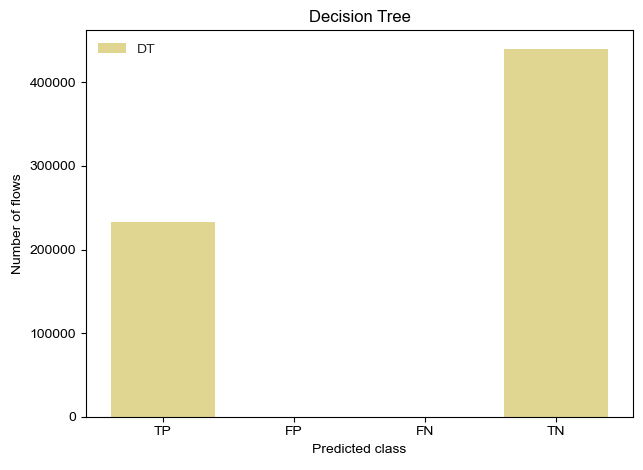

Decision Tree Model trained
Loading dataset ...
Flow Training ...


In [21]:
from trainer.decisiontree import DT_Trainer
from trainer.KNN import KNN_Trainer
from trainer.LR import LR_Trainer
from trainer.NB import NB_Trainer

df = pd.read_csv("final_dataset_1.csv")

# training the each model
dt = DT_Trainer()
dt.flow_training()
print("Decision Tree Model trained")

knn = KNN_Trainer()
knn.flow_training()
print("KNN Model trained")

lr = LR_Trainer()
lr.flow_training()
print("Logistic Regression Model trained")

nb = NB_Trainer()
nb.flow_training()
print("Naive Bayes Model trained")